# Homework 2 - Predicting School Performance

----

Objetivo deste trabalho é prever a performance de colégios brasileiros no exame ENEM.
Para realizar a previsão, diferentes fontes de dados serão utilizadas para prever
a performance dos estudantes no ENEM de 2015.

### Datasets:
O dataset é composto de três arquivos principais:
- ENEM2015.csv: contém a classificação das escolas no ENEM 2015, dado que nosso modelo tentará prever;
- DadosEscolares1996-2015.csv: contém informações como total de alunos matriculados e quantidade de classes;
- ESC2013_RMSP_CEM.csv: contém informações gerais das escolas de ensino médio no Brasil. Informações como
taxas de aprovação, notas no IDEB, notas passadas no ENEM, etc;
- RendimentoEscolar2000-2015.csv: contém informações escolares como quantidade de abandonos, alunos aprovados,
entre outros.

### Overview:

Neste Notebook iremos fazer uma breve exploração dos nossos dados para identificar a qualidade da informação
e como estão estruturadados os datasets. Com o auxílio de dicionários fornecidos junto aos dados,
algumas das variáveis serão escolhidas para serem estudadas mais profundamente e serem utilizadas de fato
no modelo final.

Os dados serão apendados junto ao dataframe do arquivo ENEM2015, que serão os dados nos quais iremos treinar
e testar nosso modelo.

### Evaluation:

A qualidade do modelo será avaliada utilizando o método de K-Fold Cross-Validation, utilizando 5 folds.
A métrica utilizada será o % de acerto, já que temos um modelo de classificação.


---
# 0. Importing Libraries and Datasets


In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np

from matplotlib import pyplot as plt
import missingno as msno
import pandas_profiling
pd.options.display.max_columns = None

enem  = pd.read_csv('./Data/ENEM2015.csv')
esc   = pd.read_csv('./Data/ESC2013_RMSP_CEM.csv') 
rendimento = pd.read_csv('./Data/RendimentoEscolar2000-2015.csv')
dadosescolares  = pd.read_csv('./Data/DadosEscolares1996-2015.csv',low_memory=False)

/home/davi/Envs/datascience/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


----
# 1. Data Exploration


### 1.1 ENEM2015

Como a base ENEM2015 contém poucos dados, podemos utilizar direto a função profile_report()
da biblioteca pandas_profiling.

In [2]:
enem.profile_report()

### 1.2  DadosEscolares1996-2015


In [3]:
dadosescolares.head()

,CODMEC,CODEOL,ANO,TIPOESC,NOME,DEP,DEPADM,SITUAÃ‡ÃƒO,MAIS EDUCAÃ‡ÃƒO,Qtde_Docentes,NUM_FUNC,MERENDA,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,DTURNOS - EMEF,T2D3D - EMEF,DTURNOS-EMEI,T2D3D - EMEI,CL_CRECHE,CL_PRE,AL_CRECHE,AL_PRE,0,1,2,MENOR3,3,4,5,6,6fund,0A3,0A4,4A6,5A6,>6,TotalEdInf,CLEM1S,CLEM2S,CLEM3S,CLEM4S,CLEMMU,ALEM1S,ALEM2S,ALEM3S,ALEM4S,ALEMMU,CLEM,ALEM,CLEF1S,CLEF2S,CLEF3S,CLEF4S,CLEF5S,CLEF6S,CLEF7S,CLEF8S,CLEFMU,ALEF1S,ALEF2S,ALEF3S,ALEF4S,ALEF5S,ALEF6S,ALEF7S,ALEF8S,ALEFMU,ALEFAC,CLEF1A4,CLEF5A8,CLEF1A8,ALEF1A4,ALEF5A8,ALEF1A8,CLE9F1S,CLE9F2S,CLE9F3S,CLE9F4S,CLE9F5S,CLE9F6S,CLE9F7S,CLE9F8S,CLE9F9S,CLE9FMU,ALE9F1S,ALE9F2S,ALE9F3S,ALE9F4S,ALE9F5S,ALE9F6S,ALE9F7S,ALE9F8S,ALE9F9S,ALE9FMU,ALE9FAC,CLE9F1A5,CLE9F6A9,ALE9F1A5,ALE9F6A9,CLE9F1A9,ALE9F1A9,CLFUNDI,ALFUNDI,CLFUNDII,ALFUNDII,CLFUND,ALFUND,TEG,TIPOENSEJA,CLEJA1A4,CLEJA5A8,CLEJAMED,ALEJA1A4,ALEJA5A8,ALEJAMED,TOTALEJA,ALES1A4_SEMI,ALES5A8_SEMI,ALESMED_SEMI,ALES1A8_EXAME,ALESMED_EXAME,ALEDPROF,EE_VIS_MED,EE_BVIS_MED,EE_INTELECTUAL_MED,EE_AUD_MED,EE_BAUD_MED,EE_Surdo_Cegueira_MED,EE_FIS_MED,EE_MEN_MED,EE_Transtornos_MED,EE_Down_MED,EE_MUL_MED,EE_SUP_MED,EE_Autismo_MED,EE_Asperger_MED,EE_Ret_MED,EE_TDI_MED,EE_CON_MED,EE_OUT_MED,TOT_EE_MED,EE_VIS_CRE,EE_BVIS_CRE,EE_INTELECTUAL_CRE,EE_AUD_CRE,EE_BAUD_CRE,EE_Surdo_Cegueira_CRE,EE_FIS_CRE,EE_MEN_CRE,EE_Transtornos_CRE,EE_Down_CRE,EE_MUL_CRE,EE_SUP_CRE,EE_Autismo_CRE,EE_Asperger_CRE,EE_Ret_CRE,EE_TDI_CRE,EE_CON_CRE,EE_OUT_CRE,TOT_EE_CRE,EE_VIS_FUND,EE_BVIS_FUND,EE_INTELECTUAL_FUND,EE_AUD_FUND,EE_BAUD_FUND,EE_Surdo_Cegueira_FUND,EE_FIS_FUND,EE_MEN_FUND,EE_Transtornos_FUND,EE_Down_FUND,EE_MUL_FUND,EE_SUP_FUND,EE_Autismo_FUND,EE_Asperger_FUND,EE_Ret_FUND,EE_TDI_FUND,EE_CON_FUND,EE_OUT_FUND,TOT_EE_FUND,EE_VIS_EJA,EE_BVIS_EJA,EE_INTELECTUAL_EJA,EE_AUD_EJA,EE_BAUD_EJA,EE_Surdo_Cegueira_EJA,EE_FIS_EJA,EE_MEN_EJA,EE_Transtornos_EJA,EE_Down_EJA,EE_MUL_EJA,EE_SUP_EJA,EE_Autismo_EJA,EE_Asperger_EJA,EE_Ret_EJA,EE_TDI_EJA,EE_CON_EJA,EE_OUT_EJA,TOT_EE_EJA,EE_VIS_EP,EE_BVIS_EP,EE_INTELECTUAL_EP,EE_AUD_EP,EE_BAUD_EP,EE_Surdo_Cegueira_EP,EE_FIS_EP,EE_MEN_EP,EE_Transtornos_EP,EE_Down_EP,EE_MUL_EP,EE_SUP_EP,EE_Autismo_EP,EE_Asperger_EP,EE_Ret_EP,EE_TDI_EP,EE_CON_EP,EE_OUT_EP,TOT_EE_EP,EE_VIS_PRE,EE_BVIS_PRE,EE_AUD_PRE,EE_BAUD_PRE,EE_INTELECTUAL_PRE,EE_Surdo_Cegueira_PRE,EE_FIS_PRE,EE_MEN_PRE,EE_Transtornos_PRE,EE_Down_PRE,EE_MUL_PRE,EE_SUP_PRE,EE_Autismo_PRE,EE_Asperger_PRE,EE_Ret_PRE,EE_TDI_PRE,EE_CON_PRE,EE_OUT_PRE,TOT_EE_PRE,TOT_EE,TIPO_EE,EE_Creche,EE_Pre,EE_Fund,EE_Med,EE_EJA,EE_EP,ALEDESP,TOTAL_ALUNOS
0,35191292,306602.0,2005,PARINF,FIFO ESCOLA DE EDUCACAO INFANTIL,Privada,Privada,NaN,NaN,NaN,NaN,NaN,5404.0,MORUMBI,BUTANTA,BUTANTA,OESTE,NaN,NaN,NaN,NaN,0.0,2.0,0.0,6.0,NaN,NaN,NaN,6.0,0.0,0.0,0.0,0.0,NaN,6.0,6.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,6
1,35055347,95401.0,2004,EMEF,"PRUDENTE DE MORAIS, PRES. ,EMEF",Municipal,PÃºblica,NaN,NaN,NaN,NaN,NaN,7201.0,SAO LUCAS,VILA PRUDENTE/SAPOPEMBA,IPIRANGA,LESTE,MT,2D,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,4.0,4.0,3.0,4.0,4.0,4.0,0.0,101.0,114.0,128.0,125.0,108.0,125.0,124.0,121.0,0.0,0.0,15.0,15.0,3

Vamos pegar somente os dados de 2015.

In [4]:
dadosescolares = dadosescolares[dadosescolares.ANO == 2015]

In [5]:
print('Total de colunas:')
len(dadosescolares.columns)

Total de colunas:


249

Visualizando os dados faltantes

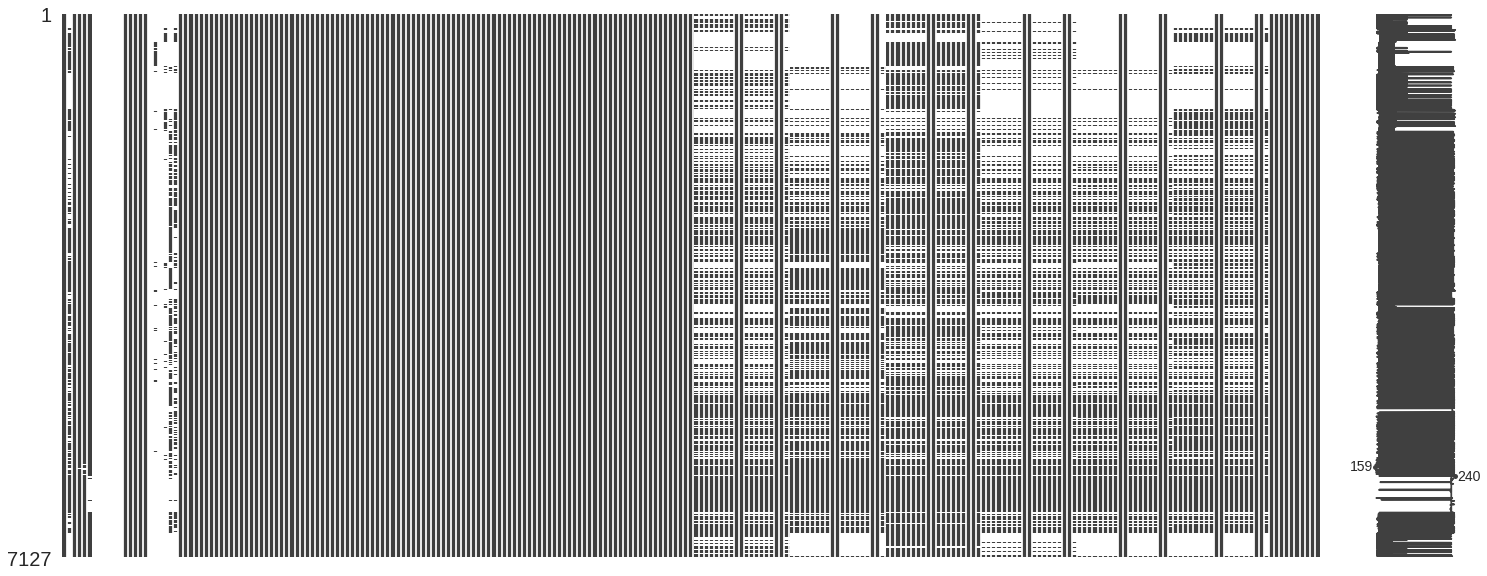

In [6]:
msno.matrix(dadosescolares)

Vamos filtrar as colunas com menos de 30% das observações.

In [7]:
null_filter = []
k = 0
for i in dadosescolares.count()/dadosescolares.count()[0]:
    if i <=0.3: null_filter.append(k)
    k+=1
dadosescolares.drop(dadosescolares.columns[null_filter],axis=1,inplace=True)

239

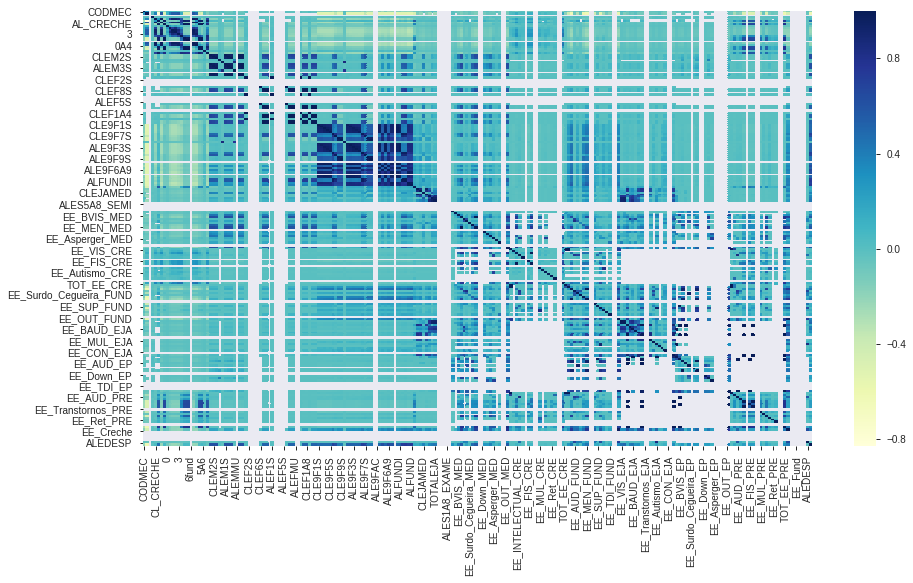

In [8]:
plt.figure(figsize=(15,8))
sns.heatmap(dadosescolares.corr(),cmap='YlGnBu')
len(dadosescolares.columns)

Temos variáveis demais. Vamos selecionar algumas dessas que
julgamos que possam ser importantes e eliminar as demais.

In [9]:
colunas_selecionadas = 'CODMEC,TIPOESC,DEP,TotalEdInf,ALEM'
colunas_selecionadas = colunas_selecionadas.split(',')

5

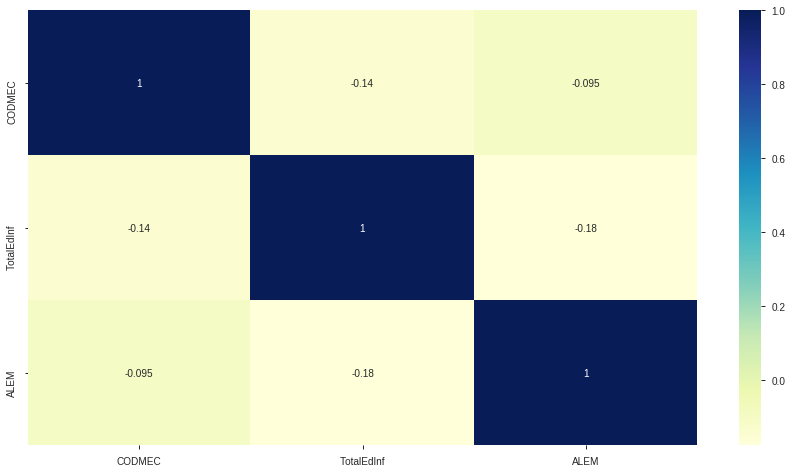

In [10]:
dadosescolares = dadosescolares[colunas_selecionadas]
plt.figure(figsize=(15,8))
sns.heatmap(dadosescolares.corr(),annot=True,cmap='YlGnBu')
len(dadosescolares.columns)

### 1.3  ESC2013_RMSP_CEM

In [11]:
esc.head(3)

,ID,LONGITUDE,LATITUDE,CODESC,CODESCTX,NOMEESC,NOMEMUN,CODMUN,NOMDIST,CODDIST,COD_SC,COD_DEP,TIP_DEP,BAIRRO,CEP,END_ESC,NUM_ESC,DDD,TELEFONE,LOCALIZA,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,ENS_REG,REG_IN_CR,REG_IN_PE,REG_FU_8A,REG_FU_9A,REG_MED,REG_MED_I,REG_MED_N,REG_MED_P,ENS_ESP,ESP_IN_CR,ESP_IN_PE,ESP_FU_8A,ESP_FU_9A,ESP_MED,ESP_MED_I,ESP_MED_N,ESP_MED_P,ESP_EJA_F,ESP_EJA_M,EJA,EJA_FUND,EJA_MED,EJA_PROJ,AP5EF_07,AP9EF_07,AP3EM_07,AB1EM_07,AP5EF_08,AP9EF_08,AP3EM_08,AB1EM_08,AP5EF_09,AP9EF_09,AP3EM_09,AB1EM_09,AP5EF_10,AP9EF_10,AP3EM_10,AB1EM_10,AP5EF_11,AP9EF_11,APR3EM_11,AB1EM_11,AP5EF_12,AP9EF_12,AP3EM_12,AB1EM_12,AP5EF_13,AP9EF_13,AP3EM_13,AB1EM_13,AP5EF_14,AP9EF_14,AP3EM_14,AB1EM_14,DI3EM_07,DI3EM_08,DI3EM_09,DI3EM_10,DI3EM_11,DI3EM_12,DI3EM_13,DI3EM_14,MAT05_AI,LP05_AI,NP05_AI,MAT07_AI,LP07_AI,NP07_AI,MAT09_AI,LP09_AI,NP09_AI,MAT11_AI,LP11_AI,NP11_AI,MAT13_AI,LP13_AI,NP13_AI,IDEB05AI,IDEB07AI,IDEB09AI,IDEB11AI,IDEB13AI,MAT05_AF,LP05_AF,NP05_AF,MAT07_AF,LP07_AF,NP07_AF,MAT09_AF,LP09_AF,NP09_AF,MAT11_AF,LP11_AF,NP11_AF,MAT13_AF,LP13_AF,NP13_AF,IDEB05AF,IDEB07AF,IDEB09AF,IDEB11AF,IDEB13AF,RED_EN13,LC_EN13,MAT_EN13,CH_EN13,CN_EN13,ENEM2013,INSE_AB,INSE_CL
0,90,-47143986,-23986886,35080548,35080548,BAIRRO DOS BARNABES RECANTO DAS ORQUIDEAS,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,2,Estadual,BAIRRO DOS BARNABES,6950000.0,RUA ANTONIO FRANCISCO PEREIRA,285,11,46841502,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,93.6,NaN,NaN,NaN,97.5,NaN,NaN,NaN,94.4,NaN,NaN,NaN,98.4,NaN,NaN,NaN,96.2,NaN,NaN,NaN,93.6,NaN,NaN,NaN,96.4,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.79,169.92,4.64,206.97,182.36,5.23,189.51,170.01,4.67,210.17,190.85,5.44,NaN,4.5,5.2,4.5,5.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50.6921,Medio Alto
1,398,-47145545,-23985717,35352524,35352524,MARIA CRISTINA BRESSALI CHAMA CRECHE MUNICIPAL,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,RUA ANTONIO SOARES GODINHO,31,11,46841666,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,399,-47145560,-23985685,35069929,35069929,TERRA NOVA EM,JUQUITIBA,3526209,BARNABES,352620910.0,NaN,3,Municipal,BARNABES,6950000.0,R ANTONIO SOARES GODINHO,35,11,46841462,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos selecionar manualmente algumas das variáveis a serem utilizadas.

In [12]:
colunas_selecionadas = ['CODESC','COD_DEP','TIP_DEP','LAB_INF','QD_ESP_C','QD_ESP_D','BIBLIO',
                        'INSE_AB','ENEM2013','AB1EM_14','AP3EM_14','DI3EM_14'
                        ,'IDEB13AF','NP13_AF']

14

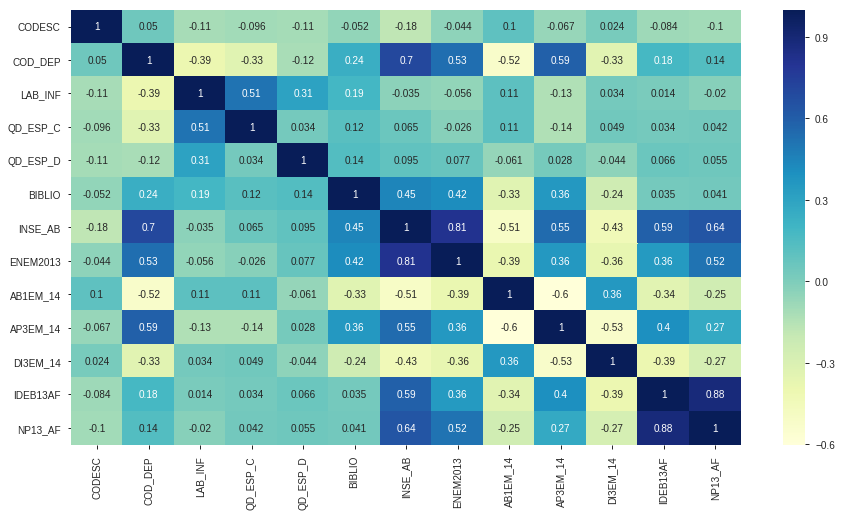

In [13]:
esc = esc[colunas_selecionadas]
plt.figure(figsize=(15,8))
sns.heatmap(esc.corr(),annot=True,cmap='YlGnBu')
len(esc.columns)

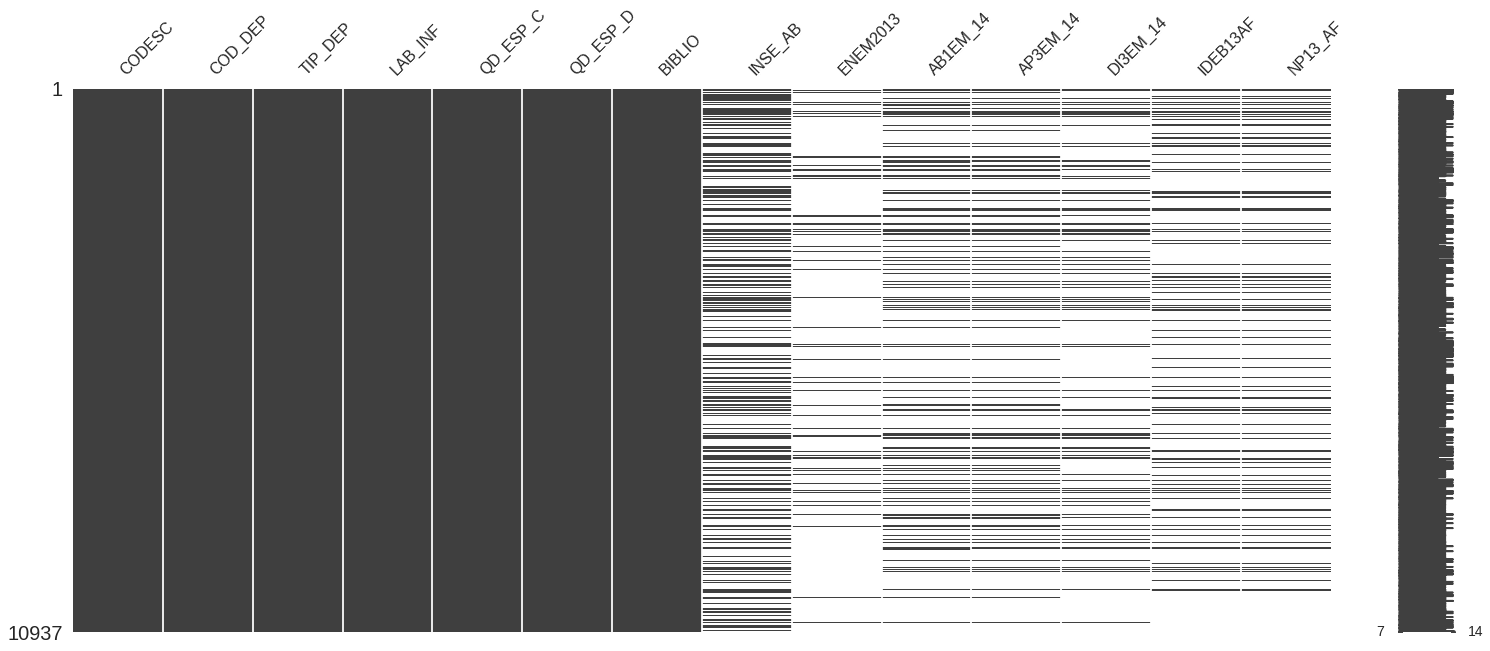

In [14]:
msno.matrix(esc)

Tem bastante dado faltante, mas as informações são relevantes, portanto vamos manter.

### 1.4 RendimentoEscolar2000-2015

In [15]:
rendimento.head()

,CODMEC,ANO,DEP,NOME,SETEDU,DISTRITO07,SUBPREF,CORED,ZONA,EFABAND9ANOS1S,EFABAND9ANOS2S,EFABAND9ANOS3S,EFABAND9ANOS4S,EFABAND9ANOS5S,EFABAND9ANOS6S,EFABAND9ANOS7S,EFABAND9ANOS8S,EFABAND9ANOS9S,EFABAND1S,EFABAND2S,EFABAND3S,EFABAND4S,EFABAND5S,EFABAND6S,EFABAND7S,EFABAND8S,TOTALEF_ABAND,EFAPROV9ANOS1S,EFAPROV9ANOS2S,EFAPROV9ANOS3S,EFAPROV9ANOS4S,EFAPROV9ANOS5S,EFAPROV9ANOS6S,EFAPROV9ANOS7S,EFAPROV9ANOS8S,EFAPROV9ANOS9S,EFAPROV1S,EFAPROV2S,EFAPROV3S,EFAPROV4S,EFAPROV5S,EFAPROV6S,EFAPROV7S,EFAPROV8S,TOTALEF_APROV,EFREPROV9ANOS1S,EFREPROV9ANOS2S,EFREPROV9ANOS3S,EFREPROV9ANOS4S,EFREPROV9ANOS5S,EFREPROV9ANOS6S,EFREPROV9ANOS7S,EFREPROV9ANOS8S,EFREPROV9ANOS9S,EFREPROV1S,EFREPROV2S,EFREPROV3S,EFREPROV4S,EFREPROV5S,EFREPROV6S,EFREPROV7S,EFREPROV8S,TOTALEF_REPROV,CONCLUINTES_EF,EMABAND1S,EMABAND2S,EMABAND3S,EMABAND4S,TOTAL_EM_ABAND,EMREPROV1S,EMREPROV2S,EMREPROV3S,EMREPROV4S,TOTAL_EM_REPROV,EMAPROV1S,EMAPROV2S,EMAPROV3S,EMAPROV4S,TOTAL_EM_APROV,CONCLUINTES_EM,CONCLUINTES_EJA,EPAPROV,EPREPROV,EPABAND,EJAIABAND,EJAIAPROV,EJAIREPROV,EJAITOTAL,EJAIIABAND,EJAIIAPROV,EJAIIREPROV,EJAIITOTAL,"EJATOTAL,,"
0,35053107,2014,MUNICIPAL,"MILTOM CAMPOS, SEN.",1105,BRASILANDIA,FREGUESIA/BRASILANDIA,FREGUESIA/BRASILANDIA,NORTE,3,6,5,4,9,2,2,5,18,0,0,0,0,0,0,0,0,0,85,74,60,71,96,37,110,73,65,0,0,0,0,0,0,0,0,0,0,0,0,2,0,8,5,9,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,0,0,0,20,9,10,39,37,65,31,133,"172,"
1,35053119,2014,MUNICIPAL,THEO DUTRA,1107,BRASILANDIA,FREGUESIA/BRASILANDIA,FREGUESIA/BRASILANDIA,NORTE,0,0,0,0,2,0,6,6,4,0,0,0,0,0,0,0,0,0,98,98,98,91,91,0,82,78,111,0,0,0,0,0,0,0,0,0,0,3,18,2,1,0,25,9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,103,0,0,0,0,0,0,0,1,103,59,163,"163,,"
2,35053120,2014,MUNICIPAL,PLINIO AYROSA,2906,FREGUESIA DO O,FREGUESIA/BRASILANDIA,FREGUESIA/BRASILANDIA,NORTE,5,2,1,2,2,0,2,0,3,0,0,0,0,0,0,0,0,0,67,76,69,62,94,0,122,100,79,0,0,0,0,0,0,0,0,0,0,1,5,1,2,0,1,21,27,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,0,0,0,0,0,0,0,29,65,26,120,"120,,"
3,35053132,2014,MUNICIPAL,BRASIL-JAPAO,6703,RIO PEQUENO,BUTANTA,BUTANTA,OESTE,1,1,0,1,1,0,15,6,1,0,0,0,0,0,0,0,0,0,55,54,35,65,63,0,47,53,60,0,0,0,0,0,0,0,0,0,1,0,9,2,2,0,23,20,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,110,0,0,0,30,16,13,59,26,110,122,258,"317,,"
4,35053144,2014,MUNICIPAL,"AMORIM LIMA, DES.",1201,BUTANTA,BUTANTA,BUTANTA,OESTE,1,2,0,0,0,0,4,3,4,0,0,0,0,0,0,0,0,0,59,86,68,73,67,33,82,81,73,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,4,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"0,"


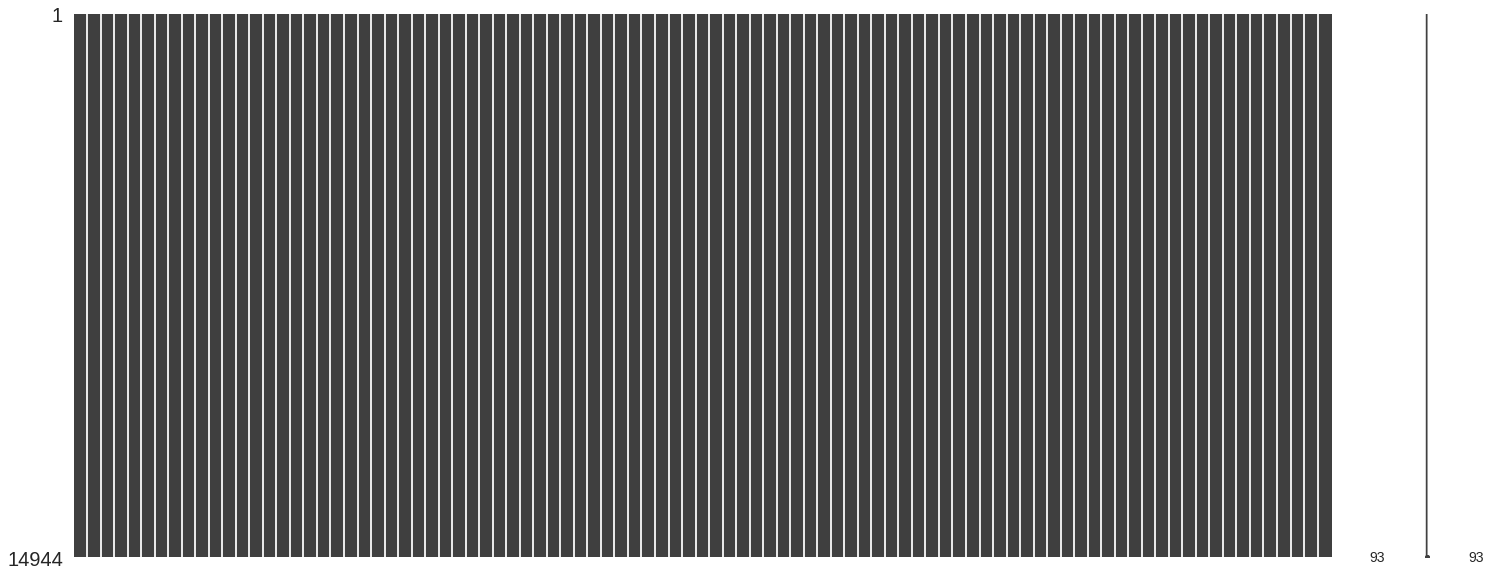

In [16]:
msno.matrix(rendimento)

Base de dados está completa, porém, ao analisar os dados vemos um problema em relação às
informações do ensino médio.

In [17]:
variaveis_ensinomedio = []
for i in rendimento.columns:
    if i[0:2] == 'EM':
        variaveis_ensinomedio.append(i)
    elif 'TOTAL_EM' in i:
        variaveis_ensinomedio.append(i)

In [18]:
variaveis_ensinomedio

['EMABAND1S',
 'EMABAND2S',
 'EMABAND3S',
 'EMABAND4S',
 'TOTAL_EM_ABAND',
 'EMREPROV1S',
 'EMREPROV2S',
 'EMREPROV3S',
 'EMREPROV4S',
 'TOTAL_EM_REPROV',
 'EMAPROV1S',
 'EMAPROV2S',
 'EMAPROV3S',
 'EMAPROV4S',
 'TOTAL_EM_APROV']

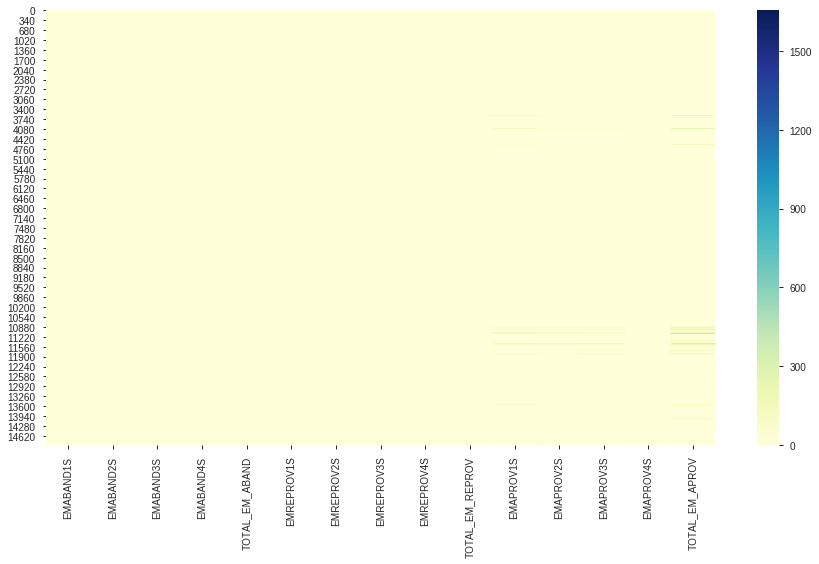

In [19]:
plt.figure(figsize=(15,8))
sns.heatmap(rendimento[variaveis_ensinomedio],cmap='YlGnBu')

Os valores são em sua maioria iguais a zero! Isso não vai nos ajudar.

Base de dados não tem nenhum dado faltante! Porém, parece que as variáveis com os valores
totais não estão corretas. Vamos manualmente calcular os totais somando as colunas respectivas.

In [20]:
rendimento.columns[9]
col_efaband = list(rendimento.columns[9:9+17])
col_efaprov = list(rendimento.columns[27:27+17])
col_efreprov= list(rendimento.columns[45:45+17])

col_emaband  = list(rendimento.columns[64:64+4])
col_emreprov = list(rendimento.columns[69:69+4])
col_emaprov  = list(rendimento.columns[74:74+4])

col_sig = col_efaband + col_efaprov + col_efreprov + col_emaband + col_emreprov + col_emaprov

Vamos fazer a seleção das variáveis.

In [21]:
rendimento['total_ef'] = rendimento[col_efaband + col_efaprov + col_efreprov].sum(axis=1)
rendimento['ef_aband'] = rendimento[col_efaband].sum(axis=1)
rendimento['ef_aprov'] = rendimento[col_efaprov].sum(axis=1)
rendimento['ef_reprov'] = rendimento[col_efreprov].sum(axis=1)
rendimento['total_em'] = rendimento[col_emaband + col_emaprov + col_emreprov].sum(axis=1)
rendimento['em_aband'] = rendimento[col_emaband].sum(axis=1)
rendimento['em_aprov'] = rendimento[col_emaprov].sum(axis=1)
rendimento['em_reprov'] = rendimento[col_emreprov].sum(axis=1)

In [22]:
colunas_selecionadas = 'CODMEC,ANO,DEP,total_ef,ef_aband,ef_aprov,ef_reprov'
colunas_selecionadas = colunas_selecionadas.split(',')
rendimento = rendimento[colunas_selecionadas]

In [23]:
rendimento.head()

,CODMEC,ANO,DEP,total_ef,ef_aband,ef_aprov,ef_reprov
0,35053107,2014,MUNICIPAL,773,54,671,48
1,35053119,2014,MUNICIPAL,833,18,747,68
2,35053120,2014,MUNICIPAL,744,17,669,58
3,35053132,2014,MUNICIPAL,522,26,432,64
4,35053144,2014,MUNICIPAL,656,14,622,20


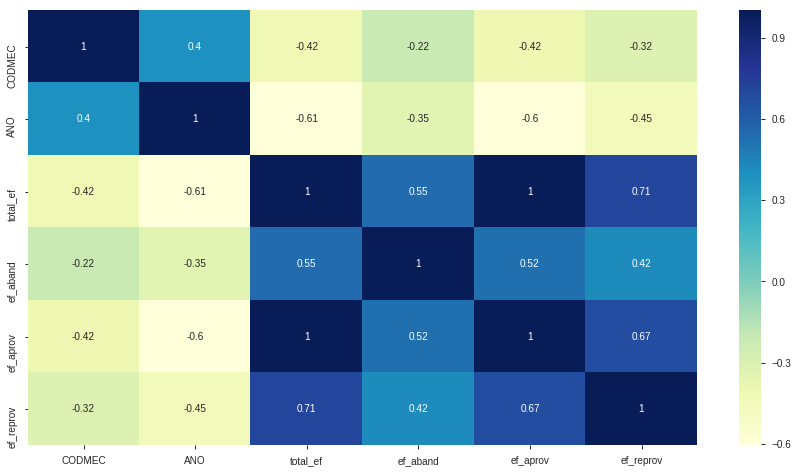

In [24]:
plt.figure(figsize=(15,8))
sns.heatmap(rendimento.corr(),annot=True,cmap='YlGnBu')

Por fim, vamos fazer um feature engineering e subsituir os valores absolutos por percentuais de
aprovação, reprovação, etc.

In [25]:
rendimento['ef_aband'] = rendimento['ef_aband']/rendimento['total_ef']
rendimento['ef_aprov'] = rendimento['ef_aprov']/rendimento['total_ef']
rendimento['ef_reprov'] = rendimento['ef_reprov']/rendimento['total_ef']

rendimento.head()

,CODMEC,ANO,DEP,total_ef,ef_aband,ef_aprov,ef_reprov
0,35053107,2014,MUNICIPAL,773,0.069858,0.868047,0.062096
1,35053119,2014,MUNICIPAL,833,0.021609,0.896759,0.081633
2,35053120,2014,MUNICIPAL,744,0.022849,0.899194,0.077957
3,35053132,2014,MUNICIPAL,522,0.049808,0.827586,0.122605
4,35053144,2014,MUNICIPAL,656,0.021341,0.948171,0.030488


Finalmente, temos a informação para diferentes anos. Vamos ficar somente com a
informação mais recente de cada escola.

In [26]:
rendimento = rendimento.loc[rendimento.groupby('CODMEC').ANO.idxmax(),:]

----
# 2. Creating the Dataset

Vamos agora juntar os datasets e criar um único datafram. Além disso, vamos lidar com as variáveis categóricas
e dados faltantes.

In [27]:
esc.rename(columns={'CODESC':'CODMEC'}, inplace=True)

In [30]:
df = pd.merge(esc, rendimento, on='CODMEC', how='outer')
df = pd.merge(df, dadosescolares, on='CODMEC',how='outer')
df = pd.merge(enem, df, left_on='CODIGO_DA_ENTIDADE',right_on='CODMEC',how='left')

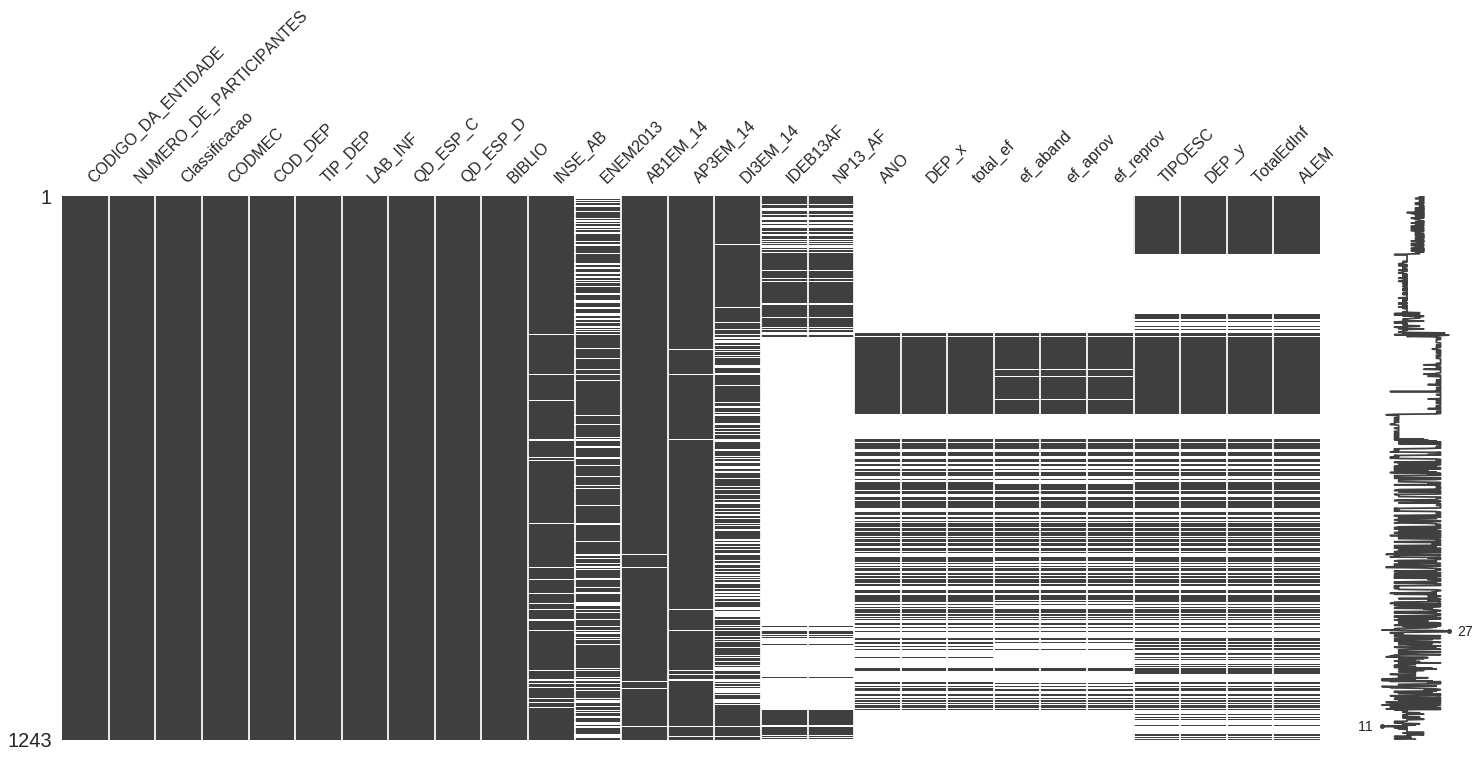

In [31]:
msno.matrix(df)

In [32]:
df.head()

,CODIGO_DA_ENTIDADE,NUMERO_DE_PARTICIPANTES,Classificacao,CODMEC,COD_DEP,TIP_DEP,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,INSE_AB,ENEM2013,AB1EM_14,AP3EM_14,DI3EM_14,IDEB13AF,NP13_AF,ANO,DEP_x,total_ef,ef_aband,ef_aprov,ef_reprov,TIPOESC,DEP_y,TotalEdInf,ALEM
0,35000139,142,1,35000139,2.0,Estadual,1.0,0.0,1.0,0.0,54.0632,NaN,4.4,84.5,20.7,3.9,4.48,NaN,NaN,NaN,NaN,NaN,NaN,EE,ESTADUAL,0.0,1093.0
1,35000140,79,1,35000140,2.0,Estadual,1.0,1.0,1.0,0.0,53.3911,NaN,7.2,88.8,19.0,3.8,3.91,NaN,NaN,NaN,NaN,NaN,NaN,EE,ESTADUAL,0.0,472.0
2,35000267,131,2,35000267,2.0,Estadual,1.0,0.0,1.0,1.0,55.7365,497.71,0.0,96.7,13.9,4.6,5.19,NaN,NaN,NaN,NaN,NaN,NaN,EE,ESTADUAL,0.0,752.0
3,35000280,146,1,35000280,2.0,Estadual,1.0,1.0,1.0,0.0,54.2056,NaN,0.0,90.9,10.6,4.3,4.73,NaN,NaN,NaN,NaN,NaN,NaN,EE,ESTADUAL,0.0,1111.0
4,35000334,95,1,35000334,2.0,Estadual,1.0,1.0,1.0,1.0,54.5818,495.39,2.3,87.2,9.4,4.6,4.70,NaN,NaN,NaN,NaN,NaN,NaN,EE,ESTADUAL,0.0,540.0


Vamos ajustar as variáveis, pois temos algumas redundantes, algumas categóricas e outras com valores faltantes.

In [33]:
print(pd.unique(df['TIPOESC']))
print(pd.unique(df['DEP_y']))
print(pd.unique(df['DEP_x']))
print(pd.unique(df['TIP_DEP']))
print(pd.unique(df['COD_DEP']))

['EE' nan 'EMEFM' 'ESC.PART.' 'ETF']
['ESTADUAL' nan 'MUNICIPAL' 'PARTICULAR' 'Federal']
[nan 'MUNICIPAL' 'PARTICULAR']
['Estadual' 'Municipal' 'Privada' 'Federal']
[2. 3. 4. 1.]


Só precisamos da variável TIP_DEP, que está completa. Vamos também
remover a variável ANO e CODMEC.

In [34]:
df.drop(['TIPOESC','DEP_y','DEP_x','COD_DEP','ANO','CODMEC'],axis=1,inplace=True)

Vamos também transformar a variável de tipo de escola em dummy. 

In [35]:
df = pd.get_dummies(df,drop_first=True)

df.head()

,CODIGO_DA_ENTIDADE,NUMERO_DE_PARTICIPANTES,Classificacao,LAB_INF,QD_ESP_C,QD_ESP_D,BIBLIO,INSE_AB,ENEM2013,AB1EM_14,AP3EM_14,DI3EM_14,IDEB13AF,NP13_AF,total_ef,ef_aband,ef_aprov,ef_reprov,TotalEdInf,ALEM,TIP_DEP_Federal,TIP_DEP_Municipal,TIP_DEP_Privada
0,35000139,142,1,1.0,0.0,1.0,0.0,54.0632,NaN,4.4,84.5,20.7,3.9,4.48,NaN,NaN,NaN,NaN,0.0,1093.0,0,0,0
1,35000140,79,1,1.0,1.0,1.0,0.0,53.3911,NaN,7.2,88.8,19.0,3.8,3.91,NaN,NaN,NaN,NaN,0.0,472.0,0,0,0
2,35000267,131,2,1.0,0.0,1.0,1.0,55.7365,497.71,0.0,96.7,13.9,4.6,5.19,NaN,NaN,NaN,NaN,0.0,752.0,0,0,0
3,35000280,146,1,1.0,1.0,1.0,0.0,54.2056,NaN,0.0,90.9,10.6,4.3,4.73,NaN,NaN,NaN,NaN,0.0,1111.0,0,0,0
4,35000334,95,1,1.0,1.0,1.0,1.0,54.5818,495.39,2.3,87.2,9.4,4.6,4.70,NaN,NaN,NaN,NaN,0.0,540.0,0,0,0


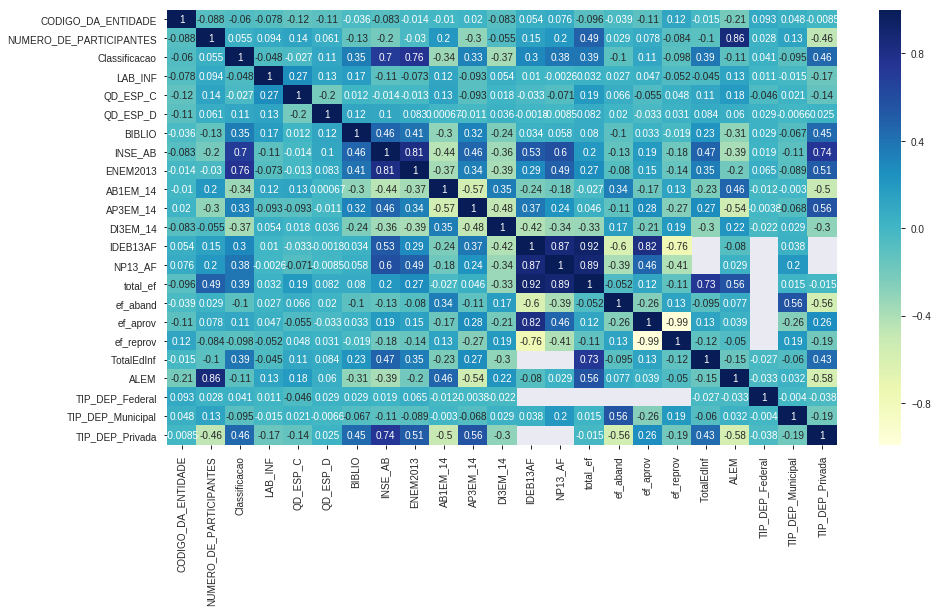

In [36]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')

---
# 3. Creating the Model

Os dados estão prontos, vamos agora gerar um modelo de previsão.

In [37]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from fancyimpute import KNN, SimpleFill
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier



Using TensorFlow backend.


In [38]:
X = df.drop(['CODIGO_DA_ENTIDADE','Classificacao'],axis=1)
y = df['Classificacao']

Preencher valores faltantes com a mediana.

In [39]:
X_filled_median = SimpleFill(fill_method='median').fit_transform(X)

In [40]:
clf = RandomForestClassifier(n_estimators=200, random_state=20,max_features=15)
print(i)
print(cross_val_score(clf, X_filled_median, y, cv=5))
print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))
print('-----------')

EJATOTAL,,
[0.54183267 0.796      0.87096774 0.8340081  0.81376518]
0.771314738122084
-----------


In [41]:
clf.fit(X_filled_median,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=20, verbose=0,
                       warm_start=False)

In [42]:
importance = []
for i,k in enumerate(X.columns):
    importance.append([k,clf.feature_importances_[i]])

sorted(importance, key=lambda x: x[1])

[['TIP_DEP_Federal', 0.00011134707196879888],
 ['TIP_DEP_Municipal', 0.0011648149234128968],
 ['ef_aband', 0.0018129881607839265],
 ['LAB_INF', 0.004244815727709589],
 ['QD_ESP_C', 0.005852816957436021],
 ['TIP_DEP_Privada', 0.0059366769180941815],
 ['QD_ESP_D', 0.008354580715337729],
 ['BIBLIO', 0.011852251708072392],
 ['ef_reprov', 0.013969197394362998],
 ['ef_aprov', 0.015568503774615333],
 ['TotalEdInf', 0.019102322915495348],
 ['total_ef', 0.02129879879209756],
 ['IDEB13AF', 0.0260477464417806],
 ['AB1EM_14', 0.032834230834767254],
 ['ALEM', 0.03675223433477409],
 ['AP3EM_14', 0.03761124930970284],
 ['DI3EM_14', 0.04894385031991091],
 ['NUMERO_DE_PARTICIPANTES', 0.06083148350641931],
 ['NP13_AF', 0.09644455097348675],
 ['INSE_AB', 0.22439420888315964],
 ['ENEM2013', 0.32687133033661203]]

Vamos que estamos usando muitas variáveis que não tem tanta importância. Vamos retirar algumas.

In [43]:
X_red = X.drop(['LAB_INF','QD_ESP_C','QD_ESP_D','BIBLIO','total_ef',
            'ef_aband','ef_reprov','TotalEdInf','TIP_DEP_Federal','TIP_DEP_Municipal'],axis=1)

In [44]:
X_filled_median = SimpleFill(fill_method='median').fit_transform(X_red)

clf = RandomForestClassifier(n_estimators=200, random_state=20)
print(i)
print(cross_val_score(clf, X_filled_median, y, cv=5))
print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))

20
[0.4501992  0.812      0.86290323 0.83805668 0.8097166 ]
0.7545751416691859


Parece que não mudou muita coisa. Vamos eliminar mais variáveis e ver o que acontece.
E testar alguns outros modelos.

In [45]:
X_red = X_red[['TIP_DEP_Privada','ENEM2013','INSE_AB','NP13_AF']]
X_filled_median = SimpleFill(fill_method='median').fit_transform(X_red)

clf = RandomForestClassifier(n_estimators=200, random_state=20)
print(cross_val_score(clf, X_filled_median, y, cv=5))
print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))

[0.51792829 0.812      0.84274194 0.85425101 0.81781377]
0.7689469999328791


Testando o Gradient Boosting e variando o número de estimadores.

In [46]:
X_filled_median = SimpleFill(fill_method='median').fit_transform(X)

for i, k in enumerate([5,10,30,50,100,200]):
    clf = GradientBoostingClassifier(n_estimators=k,)
    print(i,k)
    print(cross_val_score(clf, X_filled_median, y, cv=5))
    print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))

0 5
[0.70916335 0.784      0.81451613 0.78137652 0.78947368]
0.7748994840020875
1 10
[0.53386454 0.792      0.85887097 0.84210526 0.82995951]
0.771360057380508
2 30
[0.55378486 0.812      0.86693548 0.85020243 0.82186235]
0.7793860193027029
3 50
[0.55378486 0.808      0.85887097 0.84615385 0.82186235]
0.7769375917773337
4 100
[0.54581673 0.796      0.85887097 0.83805668 0.81376518]
0.7729019897424798
5 200
[0.55378486 0.796      0.85483871 0.84210526 0.8097166 ]
0.7712761826664869


Nenhuma melhora. Vamos testar o XGBoost. 

In [47]:
X_filled_median = SimpleFill(fill_method='median').fit_transform(X)


for i, k in enumerate([50,80,100,120]):
    clf = XGBClassifier(n_estimators=k)
    print(i,k)
    print(cross_val_score(clf, X_filled_median, y, cv=5))
    print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))
    
for i, k in enumerate([2,3,4,5,6,7]):
    clf = XGBClassifier(n_estimators=50,max_depth=k)
    print(i,k)
    print(cross_val_score(clf, X_filled_median, y, cv=5))
    print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))

0 50
[0.57370518 0.816      0.85483871 0.86234818 0.84210526]
0.7897994660511669
1 80
[0.57768924 0.812      0.85080645 0.8582996  0.8340081 ]
0.7865606773896969
2 100
[0.58565737 0.816      0.85483871 0.8582996  0.82995951]
0.7889510379014177
3 120
[0.57768924 0.808      0.86290323 0.85425101 0.82995951]
0.786560599030026
0 2
[0.54183267 0.816      0.85080645 0.85425101 0.82591093]
0.7777602128510901
1 3
[0.57370518 0.816      0.85483871 0.86234818 0.84210526]
0.7897994660511669
2 4
[0.5936255  0.812      0.86290323 0.8582996  0.8340081 ]
0.7921672832244224
3 5
[0.56175299 0.804      0.86693548 0.84615385 0.81781377]
0.7793312166509618
4 6
[0.5498008  0.828      0.875      0.84210526 0.82591093]
0.7841633982289465
5 7
[0.54183267 0.808      0.87096774 0.85425101 0.81781377]
0.7785730377172256


O melhor modelo que conseguimos foi com o XGBoost com a seguinte configuração:

In [49]:
clf = XGBClassifier(n_estimators=50,max_depth=4)
print(cross_val_score(clf, X, y, cv=5))
print(np.mean(cross_val_score(clf, X_filled_median, y, cv=5)))

[0.5936255  0.812      0.86290323 0.8582996  0.8340081 ]
0.7921672832244224


# FIM.